In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/best/pytorch/default/1/best_model.pt
/kaggle/input/traffic-detection-project/README.dataset.txt
/kaggle/input/traffic-detection-project/README.roboflow.txt
/kaggle/input/traffic-detection-project/data.yaml
/kaggle/input/traffic-detection-project/valid/labels/screenshot_2385_jpg.rf.ef051a1c0984d266d2c2ee886bdf128d.txt
/kaggle/input/traffic-detection-project/valid/labels/duque_de_caxias-2600_png_jpg.rf.926ce8b31c42ff519998cd7b0557ca10.txt
/kaggle/input/traffic-detection-project/valid/labels/ant_sales-11445_png_jpg.rf.9e55bf8d9a5a28a0f48f9810056e3eb2.txt
/kaggle/input/traffic-detection-project/valid/labels/aguanambi-3825_png_jpg.rf.151955e64cf0c9cacfe17a1e4ac16679.txt
/kaggle/input/traffic-detection-project/valid/labels/screenshot_7602_jpg.rf.0c8ef9a4f1efa21fd0805b5bb6b69406.txt
/kaggle/input/traffic-detection-project/valid/labels/screenshot_18050_jpg.rf.9c0f7ed83604a651ffc4e22020eb2532.txt
/kaggle/input/traffic-detection-project/valid/labels/ant_sales-2480_png_jpg.rf.149d02

In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 26.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")  # Load a pre-trained YOLOv8 model

model.train(
    data="/kaggle/input/traffic-detection-project/data.yaml",  # Path to your dataset config
    epochs=20,  # Adjust as needed
    imgsz=640,
    batch=16
)

Ultralytics 8.3.97 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/traffic-detection-project/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 755k/755k [00:00<00:00, 24.4MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 125MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/traffic-detection-project/train/labels... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:22<00:00, 259.02it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/traffic-detection-project/valid/labels... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:02<00:00, 218.11it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      7.79G      1.252      1.032      1.088        208        640: 100%|██████████| 363/363 [03:51<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.07it/s]

                   all        549       6270      0.694      0.713      0.754      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      7.83G      1.203     0.8127      1.063        201        640: 100%|██████████| 363/363 [03:48<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.38it/s]

                   all        549       6270      0.744      0.684      0.752      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      7.83G      1.183     0.7749      1.055        166        640: 100%|██████████| 363/363 [03:47<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.38it/s]


                   all        549       6270      0.807      0.736      0.808      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      7.83G      1.144     0.7233       1.04        142        640: 100%|██████████| 363/363 [03:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.39it/s]

                   all        549       6270      0.826      0.768      0.838      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      7.83G      1.105     0.6821      1.023        235        640: 100%|██████████| 363/363 [03:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.38it/s]

                   all        549       6270      0.813      0.821      0.869      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      7.83G      1.077     0.6549      1.009        280        640: 100%|██████████| 363/363 [03:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        549       6270      0.853      0.799      0.864      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      7.83G      1.047     0.6224     0.9943        147        640: 100%|██████████| 363/363 [03:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        549       6270      0.834      0.825      0.877      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      7.83G      1.019     0.6009     0.9853        144        640: 100%|██████████| 363/363 [03:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        549       6270       0.88      0.832      0.894      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      7.83G     0.9981     0.5749     0.9746        329        640: 100%|██████████| 363/363 [03:47<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        549       6270      0.869      0.848      0.901      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      7.83G     0.9723     0.5559     0.9642        283        640: 100%|██████████| 363/363 [03:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        549       6270      0.884       0.84      0.909      0.651


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      7.83G     0.9542     0.5289     0.9693        106        640: 100%|██████████| 363/363 [03:46<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.39it/s]

                   all        549       6270      0.872      0.865      0.911      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      7.83G     0.9175     0.5023     0.9535        160        640: 100%|██████████| 363/363 [03:45<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        549       6270      0.896      0.873      0.921      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.83G     0.8831     0.4794     0.9405        128        640: 100%|██████████| 363/363 [03:45<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        549       6270      0.899      0.877      0.927      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.83G     0.8586     0.4607     0.9319         98        640: 100%|██████████| 363/363 [03:45<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        549       6270      0.872      0.883      0.931      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.83G     0.8271     0.4416      0.921        102        640: 100%|██████████| 363/363 [03:45<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        549       6270      0.904       0.88      0.934      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      7.83G     0.8018     0.4225     0.9127        134        640: 100%|██████████| 363/363 [03:45<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        549       6270      0.912      0.891      0.939      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      7.83G     0.7725     0.4052      0.901        157        640: 100%|██████████| 363/363 [03:45<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        549       6270      0.914      0.909      0.944      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      7.83G     0.7455     0.3903     0.8926        160        640: 100%|██████████| 363/363 [03:45<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        549       6270      0.923      0.895      0.944       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      7.83G     0.7192     0.3732     0.8861        136        640: 100%|██████████| 363/363 [03:46<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        549       6270      0.931      0.894      0.945      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      7.83G     0.6976     0.3609     0.8806        162        640: 100%|██████████| 363/363 [03:46<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.41it/s]

                   all        549       6270      0.919      0.912      0.947      0.752



20 epochs completed in 1.309 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.86it/s]


                   all        549       6270       0.92      0.912      0.947      0.752
               bicycle        189        250      0.928       0.96       0.96      0.806
                   bus         81        108      0.945      0.946      0.974      0.863
                   car        520       3842      0.926      0.941      0.971      0.801
             motorbike        331       1238      0.925      0.861      0.923      0.627
                person        196        832      0.876       0.85      0.906      0.664


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 10.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f1cc8107520>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [32]:
model = YOLO("/kaggle/working/runs/detect/train2/weights/best.pt")  # Load your trained model

In [33]:
test_images_path = "/kaggle/input/traffic-detection-project/test/images"

results = model.predict(source=test_images_path, save=True, conf=0.25)


image 1/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 640x640 2 bicycles, 15 cars, 1 motorbike, 1 person, 16.1ms
image 2/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 640x640 1 bicycle, 15 cars, 5 motorbikes, 16.1ms
image 3/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1100_png_jpg.rf.8b7574e1c4f3fd7b654c2a693404fd2d.jpg: 640x640 1 bicycle, 14 cars, 7 motorbikes, 16.3ms
image 4/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1240_png_jpg.rf.7e110b54d205ef0537ddc5dec81a79c2.jpg: 640x640 12 cars, 4 motorbikes, 16.3ms
image 5/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1540_png_jpg.rf.b8ea6dd9130d82a3b6163bc3aaa823d3.jpg: 640x640 11 cars, 1 motorbike, 1 person, 16.1ms
image 6/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1680_png_jpg.rf.fede1a51e422cc8fd628a484661

In [34]:
from collections import defaultdict

vehicle_counts = defaultdict(int)

# Process each image result
for result in results:
    for box in result.boxes:
        cls = int(box.cls[0])  # Get class index
        class_name = model.names[cls]  # Convert to class name
        vehicle_counts[class_name] += 1  # Increment count

# Print total counts
print("\n🚗 **Total Vehicle Count Across All Images:**")
for vehicle, count in vehicle_counts.items():
    print(f"{vehicle}: {count}")


🚗 **Total Vehicle Count Across All Images:**
person: 480
car: 2057
bicycle: 143
motorbike: 671
bus: 50


In [18]:
# Define base timing and thresholds
DEFAULT_GREEN_TIME = 30  # Default green signal time in seconds
MAX_GREEN_TIME = 90  # Upper limit for green signal
MIN_GREEN_TIME = 20  # Lower limit for green signal

# Weightage for different vehicle types
TIME_PER_CAR = 2
TIME_PER_MOTORBIKE = 3
TIME_PER_BUS = 5
TIME_PER_TRUCK = 5

# Adjust signal time based on vehicle types
def adjust_signal_time(vehicle_counts):
    base_time = DEFAULT_GREEN_TIME
    
    # Compute time contribution from different vehicle types
    adjusted_time = (
        base_time +
        (TIME_PER_CAR * vehicle_counts.get("car", 0)) +
        (TIME_PER_MOTORBIKE * vehicle_counts.get("motorbike", 0)) +
        (TIME_PER_BUS * vehicle_counts.get("bus", 0)) +
        (TIME_PER_TRUCK * vehicle_counts.get("truck", 0))
    )

    # Ensure signal time is within min/max range
    return max(MIN_GREEN_TIME, min(adjusted_time, MAX_GREEN_TIME))

# Print header with column names
print("\n{:<6} {:<60} {:<10} {:<10}".format("S.No", "Image", "Vehicles", "Green Time (sec)"))
print("="*90)

# Process each image result
for idx, result in enumerate(results, start=1):
    image_name = result.path.split("/")[-1]  # Extract image filename
    vehicle_counts = {"car": 0, "bus": 0, "motorbike": 0, "bicycle": 0, "truck": 0}  # Initialize vehicle counts

    for box in result.boxes:
        cls = int(box.cls[0])  # Get class index
        vehicle_name = result.names[cls]  # Get vehicle name

        if vehicle_name in vehicle_counts:
            vehicle_counts[vehicle_name] += 1  

    adjusted_time = adjust_signal_time(vehicle_counts)
    total_vehicles = sum(vehicle_counts.values())

    # Print formatted output
    print("{:<6} {:<60} {:<10} {:<10}".format(idx, image_name, total_vehicles, adjusted_time))



S.No   Image                                                        Vehicles   Green Time (sec)
1      aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg 16         59        
2      aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg 19         70        
3      aguanambi-1100_png_jpg.rf.8b7574e1c4f3fd7b654c2a693404fd2d.jpg 15         60        
4      aguanambi-1240_png_jpg.rf.7e110b54d205ef0537ddc5dec81a79c2.jpg 15         63        
5      aguanambi-1540_png_jpg.rf.b8ea6dd9130d82a3b6163bc3aaa823d3.jpg 12         55        
6      aguanambi-1680_png_jpg.rf.fede1a51e422cc8fd628a4846615f65f.jpg 18         69        
7      aguanambi-2105_png_jpg.rf.913b43f78d50d1ac51dcf3e43cc7da2b.jpg 18         68        
8      aguanambi-2125_png_jpg.rf.7ded3baa4a5760fe91f32e3dc0946b61.jpg 20         71        
9      aguanambi-2250_png_jpg.rf.03ef2afb1ddf6d6fb42c62429ebbcea1.jpg 15         63        
10     aguanambi-2420_png_jpg.rf.12949ad5e139564e761cd26f2cd07f3c.jpg 12   

Loading image: /kaggle/input/traffic-detection-project/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg

0: 1280x1280 2 bicycles, 14 cars, 1 motorbike, 45.1ms
Speed: 8.6ms preprocess, 45.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1280, 1280)


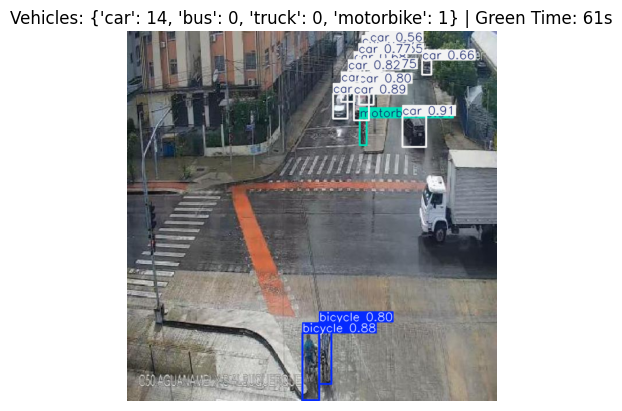

Loading image: /kaggle/input/traffic-detection-project/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg

0: 1280x1280 2 bicycles, 16 cars, 4 motorbikes, 45.2ms
Speed: 7.6ms preprocess, 45.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1280, 1280)


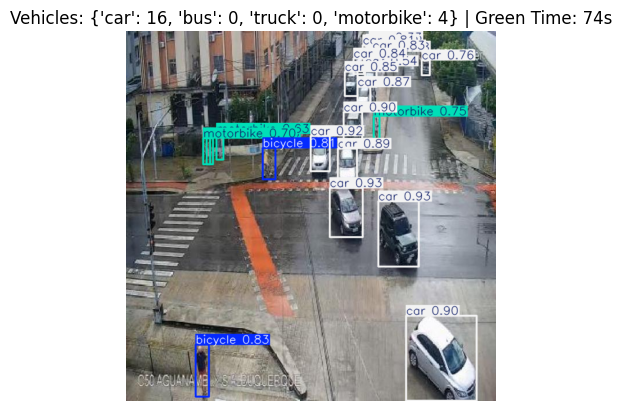

Loading image: /kaggle/input/traffic-detection-project/test/images/aguanambi-1100_png_jpg.rf.8b7574e1c4f3fd7b654c2a693404fd2d.jpg

0: 1280x1280 1 bicycle, 15 cars, 5 motorbikes, 45.3ms
Speed: 7.8ms preprocess, 45.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1280, 1280)


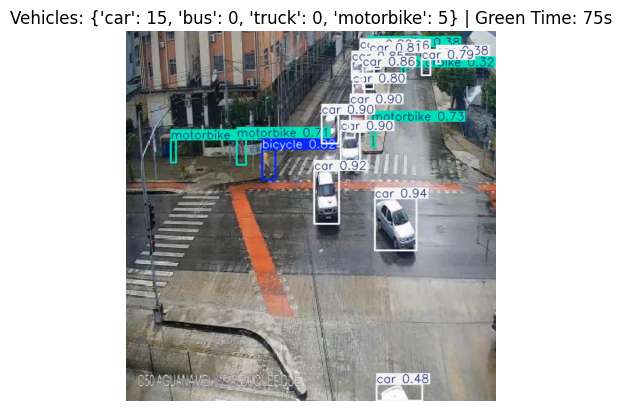

Loading image: /kaggle/input/traffic-detection-project/test/images/aguanambi-1240_png_jpg.rf.7e110b54d205ef0537ddc5dec81a79c2.jpg

0: 1280x1280 12 cars, 5 motorbikes, 1 person, 45.2ms
Speed: 7.6ms preprocess, 45.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1280, 1280)


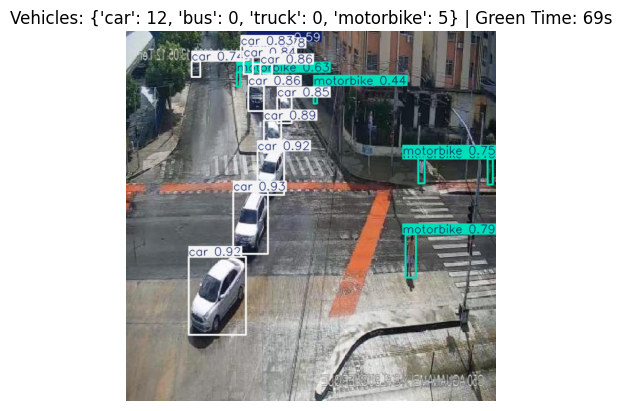

Loading image: /kaggle/input/traffic-detection-project/test/images/aguanambi-1540_png_jpg.rf.b8ea6dd9130d82a3b6163bc3aaa823d3.jpg

0: 1280x1280 11 cars, 1 motorbike, 45.0ms
Speed: 7.6ms preprocess, 45.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1280, 1280)


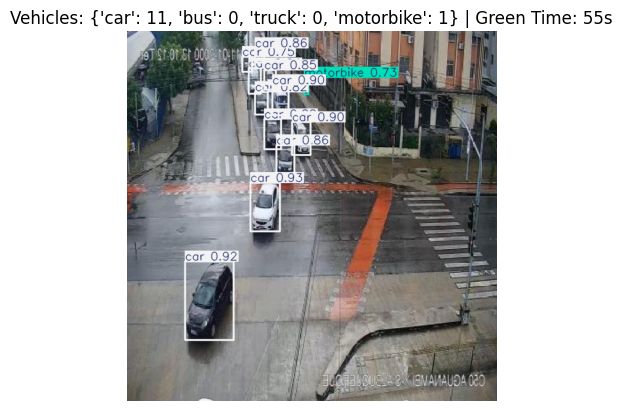

Loading image: /kaggle/input/traffic-detection-project/test/images/aguanambi-1680_png_jpg.rf.fede1a51e422cc8fd628a4846615f65f.jpg

0: 1280x1280 15 cars, 4 motorbikes, 1 person, 45.1ms
Speed: 7.8ms preprocess, 45.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1280, 1280)


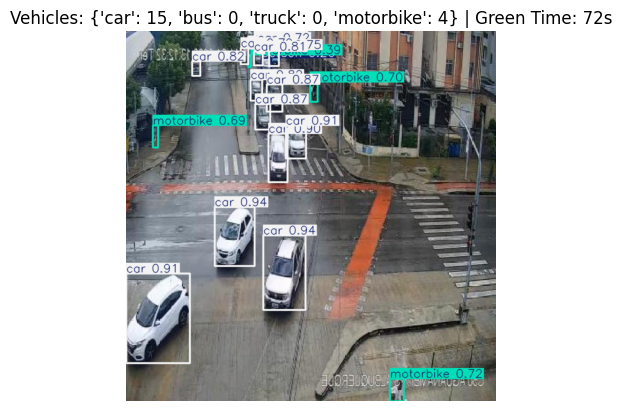

Loading image: /kaggle/input/traffic-detection-project/test/images/aguanambi-2105_png_jpg.rf.913b43f78d50d1ac51dcf3e43cc7da2b.jpg

0: 1280x1280 16 cars, 2 motorbikes, 1 person, 45.3ms
Speed: 8.4ms preprocess, 45.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1280, 1280)


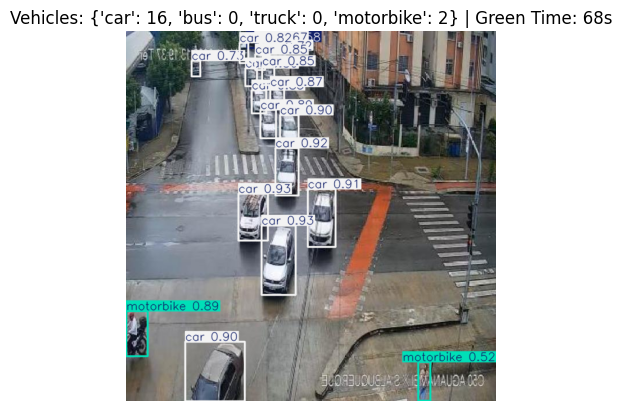

Loading image: /kaggle/input/traffic-detection-project/test/images/aguanambi-2125_png_jpg.rf.7ded3baa4a5760fe91f32e3dc0946b61.jpg

0: 1280x1280 1 bicycle, 17 cars, 5 motorbikes, 45.1ms
Speed: 8.3ms preprocess, 45.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1280, 1280)


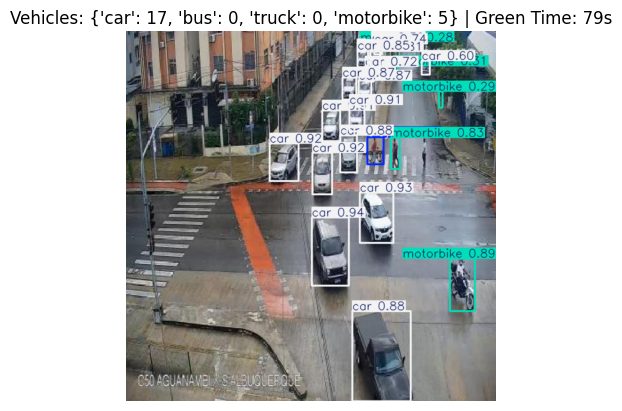

Loading image: /kaggle/input/traffic-detection-project/test/images/aguanambi-2250_png_jpg.rf.03ef2afb1ddf6d6fb42c62429ebbcea1.jpg

0: 1280x1280 12 cars, 3 motorbikes, 44.9ms
Speed: 8.0ms preprocess, 44.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1280, 1280)


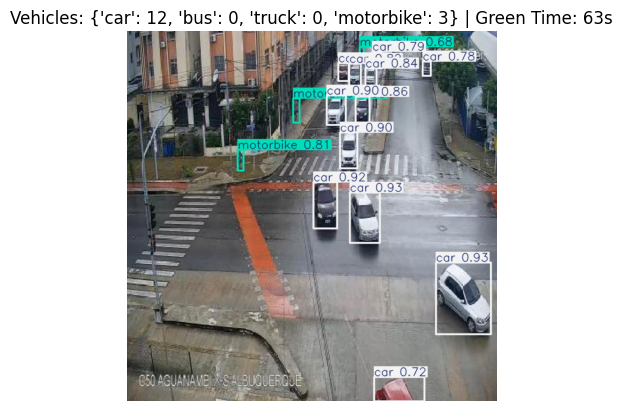

Loading image: /kaggle/input/traffic-detection-project/test/images/aguanambi-2420_png_jpg.rf.12949ad5e139564e761cd26f2cd07f3c.jpg

0: 1280x1280 9 cars, 4 motorbikes, 45.2ms
Speed: 8.0ms preprocess, 45.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1280, 1280)


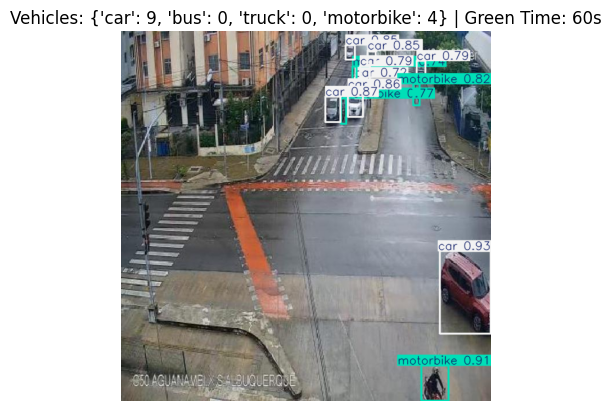

In [41]:
import os
import cv2
import matplotlib.pyplot as plt

# Define base timing and thresholds
DEFAULT_GREEN_TIME = 30  
MAX_GREEN_TIME = 90  
MIN_GREEN_TIME = 20  

# Weightage for different vehicle types
TIME_PER_CAR = 2
TIME_PER_MOTORBIKE = 3
TIME_PER_BUS = 5
TIME_PER_TRUCK = 5

# Adjust signal time based on vehicle types
def adjust_signal_time(vehicle_counts):
    base_time = DEFAULT_GREEN_TIME
    
    # Compute time contribution from different vehicle types
    adjusted_time = (
        base_time +
        (TIME_PER_CAR * vehicle_counts.get("car", 0)) +
        (TIME_PER_MOTORBIKE * vehicle_counts.get("motorbike", 0)) +
        (TIME_PER_BUS * vehicle_counts.get("bus", 0)) +
        (TIME_PER_TRUCK * vehicle_counts.get("truck", 0))
    )

    # Ensure signal time is within min/max range
    return max(MIN_GREEN_TIME, min(adjusted_time, MAX_GREEN_TIME))

image_folder = "/kaggle/input/traffic-detection-project/test/images"

# List all image files in the directory (only first 10)
image_files = sorted([f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])[:10]

# Process each image
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    print(f"Loading image: {image_path}")
    
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"⚠️ Error: Could not load image {image_path}")
        continue  # Skip this image
    
    # Run object detection with improved settings
    results = model(image, conf=0.25, iou=0.4, imgsz=1280)  # Lower confidence & IoU for better detection

    # Count vehicle types separately
    vehicle_counts = {"car": 0, "bus": 0, "truck": 0, "motorbike": 0}

    for box in results[0].boxes:
        cls = int(box.cls[0])  # Get class index
        vehicle_name = results[0].names[cls]  # Get vehicle name

        if vehicle_name in vehicle_counts:
            vehicle_counts[vehicle_name] += 1  

    # Adjust signal time using dictionary (fixed)
    adjusted_time = adjust_signal_time(vehicle_counts)

    # Apply overlay for color-coding
    overlay = image.copy()
    color = (0, 255, 0)  # Default green overlay
    cv2.rectangle(overlay, (0, 0), (image.shape[1], image.shape[0]), color, -1)
    image = cv2.addWeighted(overlay, 0.3, image, 0.7, 0)

    # Draw bounding boxes
    image_with_boxes = results[0].plot()  # Visualize detections

    # Show the image with detections
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title(f'Vehicles: {vehicle_counts} | Green Time: {adjusted_time}s')
    plt.axis("off")
    plt.show()
